# Generating Dataset 1

In [22]:
import numpy
A = numpy.random.normal(loc=0.0, scale=1.0, size=(3,2))
print("The rank of A is:",numpy.linalg.matrix_rank(A))
print(A)

The rank of A is: 2
[[ 1.52426283  0.00648853]
 [ 0.39938198 -1.14310966]
 [-0.17407347  0.84937331]]


In [23]:
X = numpy.matmul(A,numpy.random.normal(loc=0.0, scale=1.0, size=(2,500)))
print("The shape of X is:",numpy.shape(X))
print("The rank of X is:",numpy.linalg.matrix_rank(X))

The shape of X is: (3, 500)
The rank of X is: 2


In [24]:
U,S,Vh = numpy.linalg.svd(X)
X2 = numpy.matmul(X,numpy.transpose(X))
eigval,eigvec = numpy.linalg.eig(X2)

print("The left singular vectors of X are:\n", U)
print("The eigen vector are:\n", eigvec)

print("\n The singular values of X squared are are:\n", numpy.power(S,2))
print("The eigen values are:\n", eigval)

fronorm = numpy.linalg.norm(X, 'fro')
sqsum = numpy.power(S[0],2) + numpy.power(S[1],2) + numpy.power(S[2],2)
print("\n The square of the Frobenius norm of X is:\n", numpy.power(fronorm,2))
print("The sum of squares of the singular values of X is:\n", sqsum)

The left singular vectors of X are:
 [[-0.7279762   0.68257217 -0.06438858]
 [-0.57714561 -0.55941434  0.59494414]
 [ 0.37007242  0.47026676  0.80118386]]
The eigen vector are:
 [[ 0.7279762   0.68257217 -0.06438858]
 [ 0.57714561 -0.55941434  0.59494414]
 [-0.37007242  0.47026676  0.80118386]]

 The singular values of X squared are are:
 [1.46198547e+03 7.83923580e+02 6.41382345e-30]
The eigen values are:
 [1.46198547e+03 7.83923580e+02 7.32967468e-14]

 The square of the Frobenius norm of X is:
 2245.9090512591033
The sum of squares of the singular values of X is:
 2245.909051259105


Since X has a rank of 2 in a three-dimensional space, one of X's singular values should be 0. However, instead it is just very close to 0 but not 0. This is do to floating point erros in the values. The values in S cannot be exactly singular values of X because you can't completely represent the real numbers as floating points.

The matrix containing the left singular vectors of X corresponding to the (theoretically)non-zero singular values has a rank of 2. Since X also has a rank of 2 and can be created from this principal component matrix, they span the same space. Therefore they have the same span. Matrix A also has a rank of two and since X = Av, A also spans the same space as X and thus has the same span. So the principal components matrix has the same span as A. This mean that by getting the SVD of X, you can determine the span of A without knowing what A is.

# PCA of Dataset 1

Since the data has a rank of 2, it only spans 2 dimensions. That means only 2 values are needed to describe a point. Therefore only 2 principal components are necessary to capture all variations in the data.

Since X = Av -> E[x_k] = E[A_k1 $*$ v_k1 + A_k2 $*$ v_k2] for k = 1,2,3
<br>
Next, Since A and v are iid -> E[A_k1 $*$ v_k1 + A_k2 $*$ v_k2] = E[A_k1] $*$ E[v_k1] + E[A_k2] $*$ E[v_k2]
<br>
Because A and v were generated from a Gaussian distribuition with mean 0 we have
<br>
E[A_k1] $*$ E[v_k1] + E[A_k2] $*$ E[v_k2] = 0 $*$ 0 + 0 $*$ 0 = E[x_k]

In [25]:
m = numpy.mean(X, 1)
print("The mean vector is:", m)
print("As you can see the values are very small.")

The mean vector is: [ 0.10816822 -0.02025766  0.0237361 ]
As you can see the values are very small.


In [26]:
U2 = numpy.column_stack([U[:,0], U[:,1]])
print("U: \n",U2)
U2T = numpy.transpose(U2)
xtild = numpy.matmul(U2T,X)
xhat = numpy.matmul(U2,xtild)
error = numpy.power(numpy.linalg.norm(numpy.subtract(xhat,X), 'fro'),2)
print("The error is:", error)

U: 
 [[-0.7279762   0.68257217]
 [-0.57714561 -0.55941434]
 [ 0.37007242  0.47026676]]
The error is: 3.9645832518657833e-28


In [27]:
U1 = U[:,0:1]
U1T = numpy.transpose(U1)
xtild = numpy.matmul(U1T,X)
xhat = numpy.matmul(U1,xtild)
error = numpy.power(numpy.linalg.norm(numpy.subtract(xhat,X), 'fro'),2)
print("The error is:", error)
print("The second singular value square is:", numpy.power(S[1],2))

The error is: 783.9235800239809
The second singular value square is: 783.9235800239813


The first plot is the origional data while the second plot is the reconstructed data.


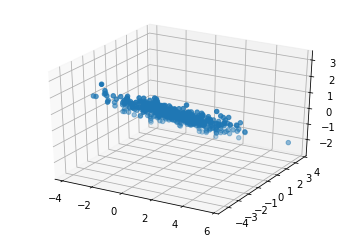

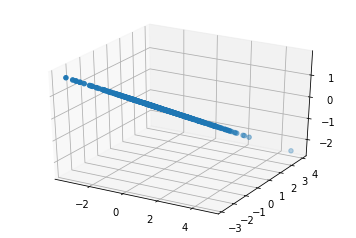

In [28]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

f = matplotlib.pyplot.figure()
axes = f.add_subplot(111, projection='3d');
axes.scatter(X[0,:], X[1,:], X[2,:], zdir='z', s=20, c=None, depthshade=True);

f2 = matplotlib.pyplot.figure()
axes2 = f2.add_subplot(111, projection='3d');
axes2.scatter(xhat[0,:], xhat[1,:], xhat[2,:], zdir='z', s=20, c=None, depthshade=True);
print("The first plot is the origional data while the second plot is the reconstructed data.")

# Generating Dataset 2

In [8]:
c = numpy.random.normal(loc=0.0, scale=numpy.power(3,0.5), size=(3,1))
X = numpy.matmul(A,numpy.random.normal(loc=0.0, scale=1.0, size=(2,500))) + c
print("The rank of X is:",numpy.linalg.matrix_rank(X))

The rank of X is: 3


# PCA and Centering of Dataset 2

In [9]:
U,S,Vh = numpy.linalg.svd(X)
U2 = numpy.column_stack([U[:,0], U[:,1]])
U2T = numpy.transpose(U2)
xhat = numpy.matmul(U2,U2T)
xhat = numpy.matmul(xhat,X)
error = numpy.power(numpy.linalg.norm(numpy.subtract(xhat,X), 'fro'),2)
print("The error is:", error)
print("The singular values of X are:", S)

x1 = X[0]
x2 = X[1]
x3 = X[2]

m = numpy.empty([3, 1])
m[0] = numpy.mean(x1)
m[1] = numpy.mean(x2)
m[2] = numpy.mean(x3)

Xc = X - m
U,S,Vh = numpy.linalg.svd(Xc)
U2 = numpy.column_stack([U[:,0], U[:,1]])
U2T = numpy.transpose(U2)
xhat = numpy.matmul(U2,U2T)
xhat = numpy.matmul(xhat,Xc)
xhat = xhat + m
error = numpy.power(numpy.linalg.norm(numpy.subtract(xhat,X), 'fro'),2)
print("The error of the centered data is:", error)

The error is: 282.0769822552029
The singular values of X are: [54.72579085 23.80940238 16.79514758]
The error of the centered data is: 7.033361341806077e-29


# Generating Dataset 3

In [10]:
n = numpy.random.normal(loc=0.0, scale=numpy.power(0.01,0.5), size=(3,1))
X = numpy.matmul(A,numpy.random.normal(loc=0.0, scale=1.0, size=(2,500))) + n
for i in range(500):
    norm = numpy.linalg.norm(X[:,i]);
    X[:,i] = X[:,i]/norm;
print("The rank of X is:",numpy.linalg.matrix_rank(X))
U,S,Vh = numpy.linalg.svd(X)
print("The singular values of X are:", S)

The rank of X is: 3
The singular values of X are: [16.76081342 13.76891199  5.43067179]


# PCA of Dataset 3

The error is: 29.492196094187477
The third singular value squared is: 29.492196094187456
The first plot is the normalized data while the second plot is the denoised data.


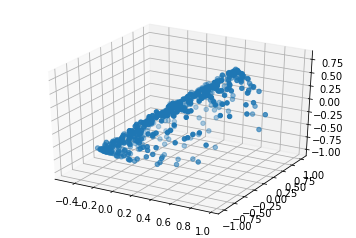

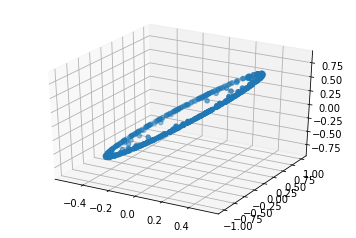

In [11]:
f = matplotlib.pyplot.figure()
axes = f.add_subplot(111, projection='3d');
axes.scatter(X[0,:], X[1,:], X[2,:], zdir='z', s=20, c=None, depthshade=True);

U2 = numpy.column_stack([U[:,0], U[:,1]])
U2T = numpy.transpose(U2)
Xd = numpy.matmul(U2,U2T)
Xd = numpy.matmul(Xd,X)

f2 = matplotlib.pyplot.figure()
axes2 = f2.add_subplot(111, projection='3d');
axes2.scatter(Xd[0,:], Xd[1,:], Xd[2,:], zdir='z', s=20, c=None, depthshade=True);

error = numpy.power(numpy.linalg.norm(numpy.subtract(Xd,X), 'fro'),2)
print("The error is:", error)
print("The third singular value squared is:", numpy.power(S[2],2))
print("The first plot is the normalized data while the second plot is the denoised data.")

# Real Data

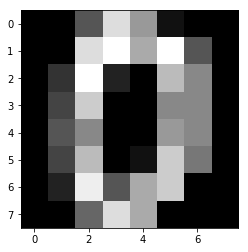

In [12]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)
images = numpy.transpose(images)
Im = numpy.reshape(numpy.asmatrix(images[:,0]),(8,8))
matplotlib.pyplot.imshow(Im,cmap='gray');

Mean centered image:


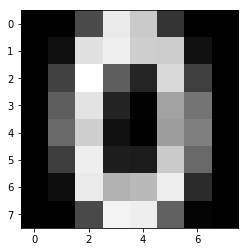

In [16]:
m = numpy.empty([64, 178])
for i in range(178):
    m[:,i] = numpy.mean(images, 1)
print("Mean centered image:")
Xbar = images - m
matplotlib.pyplot.imshow(numpy.reshape(numpy.mean(images, 1),(8,8)),cmap='gray');

The smallest k that satisfies the inequality is: 18
The singular values of Xbar:


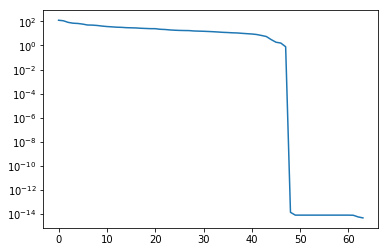

In [17]:
U,S,Vh = numpy.linalg.svd(Xbar)
matplotlib.pyplot.semilogy(range(64),S);
k = 0
sum = 0
while sum < .9:
    k+=1
    sum = 0
    for i in range(k):
        sum += numpy.square(S[i]);
    sum = sum/numpy.square(numpy.linalg.norm(Xbar))
print("The smallest k that satisfies the inequality is:",k)
print("The singular values of Xbar:")

First principal component image:


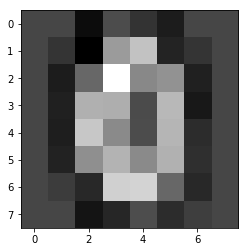

In [18]:
Uk = U[:,0:18];
matplotlib.pyplot.imshow(numpy.reshape(Uk[:,0],(8,8)),cmap='gray');
print("First principal component image:")

Scatter plot of the feature vecotrs:


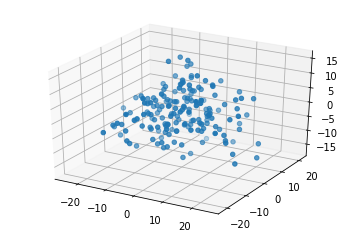

In [19]:
Xf = numpy.matmul(numpy.transpose(U[:,0:3]),Xbar);
f = matplotlib.pyplot.figure()
axes = f.add_subplot(111, projection='3d');
axes.scatter(Xf[0,:], Xf[1,:], Xf[2,:], zdir='z', s=20, c=None, depthshade=True);
print("Scatter plot of the feature vecotrs:")

In [20]:
Xr = numpy.matmul(U[:,0:3],Xf) + m
error = numpy.square(numpy.linalg.norm(Xr-images));
print("The error is:", error)
sqsum = numpy.sum(numpy.square(S)[3:64])
print("As seen in earlier parts, the error in the reconstructed matrix is equal to the sum of the squared singular values corresponding to the unused singular vectors.")
print("To demonstrate, the sum of the squared removed singular values is:",sqsum)

The error is: 36050.010605737116
As seen in earlier parts, the error in the reconstructed matrix is equal to the sum of the squared singular values corresponding to the unused singular vectors.
To demonstrate, the sum of the squared removed singular values is: 36050.010605737145


The reconstructed image:


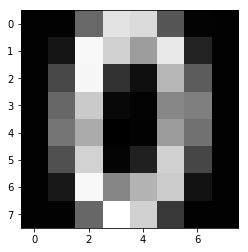

In [21]:
matplotlib.pyplot.imshow(numpy.reshape(Xr[:,0],(8,8)),cmap='gray');
print("The reconstructed image:")